# Data Munging

This notebook will load in the clean data and add noise to generate an input set.  There are two types of noise to consider: 
+ Salt and Pepper noise 
+ Gaussian Noise 


A few datasets will be created.  Each will have varying levels of noise added.  Three tiers probably.  Easy, medium, hardhard.  

In [1]:
import os 
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image  

%matplotlib inline 

In [2]:
import utils 

## Create "easy" dataset

One snp noise.  One with Gaussian noise.  

In [3]:
## SNP noise 
root_dir = 'data/dataset64'
dest_dir = 'data/dataset64-easy-snp'

if not os.path.exists(dest_dir):
    os.mkdir(dest_dir)
    
noise_fn = utils.corrupt_image_snp
noise_fn_params = {'ratio': 0.5, 'amount': 0.03}

utils.build_corrupted_dataset(root_dir, dest_dir, noise_fn, noise_fn_params)


/home/rshn/Development/xray-denoising/utils.py:27: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out[coords] = 255
/home/rshn/Development/xray-denoising/utils.py:33: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out[coords] = 0


In [4]:
## Gaus noise 
root_dir = 'data/dataset64'
dest_dir = 'data/dataset64-easy-gaus'

if not os.path.exists(dest_dir):
    os.mkdir(dest_dir)
    
noise_fn = utils.corrupt_image_gaus
noise_fn_params = {'p': 0.2, 'mean': 0, 'var': 0.1}

utils.build_corrupted_dataset(root_dir, dest_dir, noise_fn, noise_fn_params)


## Create "medium" dataset

In [5]:
## SNP noise 
root_dir = 'data/dataset128'
dest_dir = 'data/dataset128-medium-snp'

if not os.path.exists(dest_dir):
    os.mkdir(dest_dir)
    
noise_fn = utils.corrupt_image_snp
noise_fn_params = {'ratio': 0.5, 'amount': 0.1}

utils.build_corrupted_dataset(root_dir, dest_dir, noise_fn, noise_fn_params)


In [6]:
## Gaus noise 
root_dir = 'data/dataset128'
dest_dir = 'data/dataset128-medium-gaus'

if not os.path.exists(dest_dir):
    os.mkdir(dest_dir)
    
noise_fn = utils.corrupt_image_gaus
noise_fn_params = {'p': 0.2, 'mean': 0, 'var': 0.2}

utils.build_corrupted_dataset(root_dir, dest_dir, noise_fn, noise_fn_params)


## Create "hard" dataset

In [7]:
## SNP noise 
root_dir = 'data/dataset128'
dest_dir = 'data/dataset128-hard-snp'

if not os.path.exists(dest_dir):
    os.mkdir(dest_dir)
    
noise_fn = utils.corrupt_image_snp
noise_fn_params = {'ratio': 0.5, 'amount': 0.25}

utils.build_corrupted_dataset(root_dir, dest_dir, noise_fn, noise_fn_params)


In [8]:
## Gaus noise 
root_dir = 'data/dataset128'
dest_dir = 'data/dataset128-hard-gaus'

if not os.path.exists(dest_dir):
    os.mkdir(dest_dir)
    
noise_fn = utils.corrupt_image_gaus
noise_fn_params = {'p': 0.2, 'mean': 0, 'var': 0.5}

utils.build_corrupted_dataset(root_dir, dest_dir, noise_fn, noise_fn_params)


# Plot examples of corrupted images 

In [10]:
img1 = Image.open('data/dataset128/IM-0015-0001.jpeg')
img2 = Image.open('data/dataset128/IM-0122-0001.jpeg')
img3 = Image.open('data/dataset128/IM-0477-0001.jpeg')
img3_r = img3.rotate(90)
img3_r2 = img3.rotate(180)

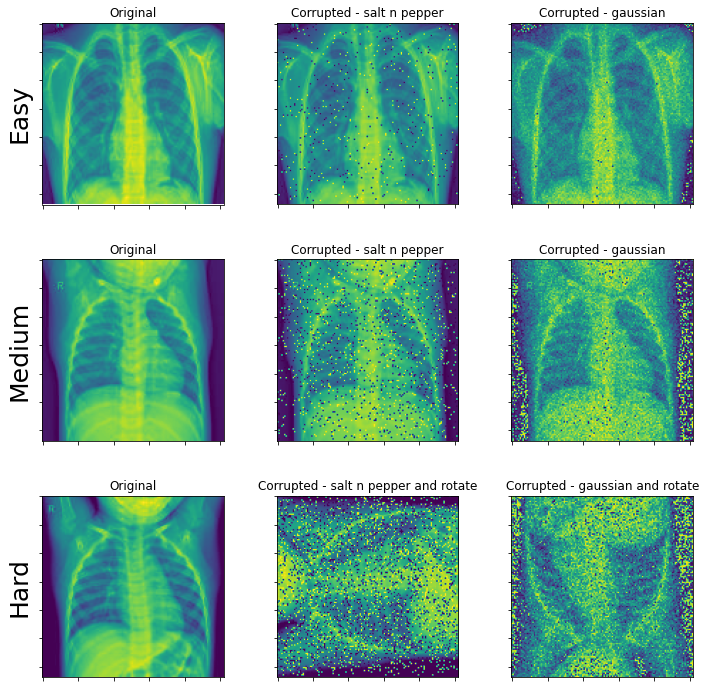

In [12]:
fig, ax = plt.subplots(3, 3, figsize=(10, 10))

rows = ['Easy', 'Medium', 'Hard']
for a, row in zip(ax[:,0], rows):
    a.set_ylabel(row, rotation=90, size=25)


for a in ax.reshape(-1): 
    a.set_yticklabels([])
    a.set_xticklabels([])

ax[0, 0].imshow(img1)
ax[0, 0].set_title('Original')

ax[1, 0].imshow(img2)
ax[1, 0].set_title('Original')

ax[2, 0].imshow(img3)
ax[2, 0].set_title('Original')


# easy 
ax[0, 1].imshow(utils.corrupt_image_snp(img1, 0.5, 0.03))
ax[0, 1].set_title('Corrupted - salt n pepper')

ax[0, 2].imshow(utils.corrupt_image_gaus(img1, 0.2, 0, 0.1))
ax[0, 2].set_title('Corrupted - gaussian')


##
# medium 
ax[1, 1].imshow(utils.corrupt_image_snp(img2, 0.5, 0.1))
ax[1, 1].set_title('Corrupted - salt n pepper')

ax[1, 2].imshow(utils.corrupt_image_gaus(img2, 0.2, 0, 0.2))
ax[1, 2].set_title('Corrupted - gaussian')


##
# hard 
ax[2, 1].imshow(utils.corrupt_image_snp(img3_r, 0.5, 0.25))
ax[2, 1].set_title('Corrupted - salt n pepper and rotate')

ax[2, 2].imshow(utils.corrupt_image_gaus(img3_r2, 0.2, 0, 0.5))
ax[2, 2].set_title('Corrupted - gaussian and rotate')

plt.tight_layout()